<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/RandomDecisionForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

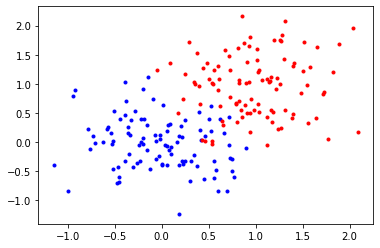

In [13]:
import requests
import matplotlib.pyplot as plt
import numpy as np
r = requests.get("https://raw.githubusercontent.com/ollihansen90/zeugs/main/ML_utils.py")
with open("utils.py", "w") as file:
    file.write(r.text)

from utils import get_data, plot_stuff

data, label = get_data(100, 2, mus=np.array([[0,0], [1,1]]), vars=[0.5,0.5])
plot_stuff(data, label)

In [32]:
class Forest():
    # TODO:
    #   - ALLES
    def __init__(self, num_trees):
        pass

class Tree():
    # TODO:
    #   - Multiklassen-Decisiontree
    #   - Allgemeine Maß-Funktion (vllt. als Methode)
    def __init__(self, links=None, rechts=None, depth=0):
        # Input:
        #   links, rechts: Entweder Knoten oder np.float
        #   depth: Tiefe des Knoten im Baum
        self.links = links
        self.rechts = rechts
        self.depth = depth
        self.thresh = None  # Entscheidungsbarriere
        self.obs = None     # Welche Observable wird betrachtet?

    def __call__(self, x):
        # Forward-Pass
        # Input:
        #   x: Zu klassifizierender Punkt
        # Output:
        #   Nächster Knoten oder Klasse
        output = x[self.obs]>=self.thresh
        if output:
            if isinstance(self.rechts, Tree):
                return self.rechts(x)
            else:
                return self.rechts
        else:
            if isinstance(self.links, Tree):
                return self.links(x)
            else:
                return self.links
    
    def learn(self, x, label, obslist=None, maxdepth=3, minlen=5):
        # Lernmethode:
        # Input:
        #   x: Zu fittende Daten
        #   label: Label zu gefittete Daten
        #   obslist: Liste der Observablen, die zur Entscheidung beitragen sollen
        #   maxdepth: Abbruchbedingung für maximale Tiefe des Baums
        #   minlen: Minimale Anzahl Punkte zur Entscheidung

        # Abbruch, wenn
        #   - Alle Label gleich sind (np.var(label)==0)
        #   - Maximale Tiefe ist erreicht (self.depth==maxdepth)
        #   - Anzahl Punkte für Entscheidung wird zu klein (len(label<=minlen))
        # Setze self.links und self.rechts auf "mittleres" Label, self.thresh und
        #   self.obs auf irgendwelche Werte, damit keine Fehler bei Forward-Pass
        #   auftreten
        # Später: Multiklassen nicht mehr mittleres Label sondern häufigstes
        #   Label 
        if np.var(label)==0 or self.depth==maxdepth or len(label)<=minlen:
            self.links = self.rechts = np.mean(label)
            self.thresh = 0.5
            self.obs = 0
            return

        # Setze obslist auf alle Observablen, wenn keine explizit vorgegeben werden
        if not obslist:
            obslist = range(len(x[0]))

        # Suche Threshold mit "bester" Unterteilung
        # Hier: Summe der Varianzen der Unterteilungen (für zwei Klassen)
        # Später: irgendein Maß, z.B. Entropie
        globmin = np.infty
        globargmin = -1
        globobs = -1
        measure = lambda x1, x2: np.var(x1)+np.var(x2) 
        for obs in obslist:
            values = x[:,obs]
            for val in values:
                kleiner = x[x[:, obs]<val, obs]
                groesser = x[x[:, obs]>=val, obs]
                if len(kleiner)==0 or len(groesser)==0:
                    continue
                loss = measure(kleiner, groesser)
                if loss<globmin:
                    globmin = loss
                    globargmin = val
                    globobs = obs
        self.thresh = globargmin
        self.obs = obs

        # Bestimme Nachfolger self.links und self.rechts und trainiere direkt
        self.links = Tree(depth=self.depth+1)
        self.links.learn(x[x[:, obs]<globargmin], label[x[:, obs]<globargmin], maxdepth=maxdepth, minlen=minlen)
        self.rechts = Tree(depth=self.depth+1)
        self.rechts.learn(x[x[:, obs]>=globargmin], label[x[:, obs]>=globargmin], maxdepth=maxdepth, minlen=minlen)

t = Tree()
t.learn(data, label)
print(t(np.array([0.5,0.6])))

0.6 0.778532418674035
0.6 -0.13458040081173336
0.6 0.2837608303177432
0.5 0.5
0.5833333333333334
